# Logistic Regression 

- P.S. -> Predict whether the passenger travelling in titanic will survive or not

- Dataset -> titanic

- Features -> sex, pclass, sibsp, parch, ...etc
- Target Variable -> Survived

- Type of ML Problem -> Classification

- ML Model -> Logistic Regression 

In [53]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split  # train-test split

from sklearn.linear_model import LogisticRegression  # model 

In [54]:
df = sns.load_dataset('titanic')

In [55]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [57]:
df.isnull().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

<Axes: xlabel='age', ylabel='Density'>

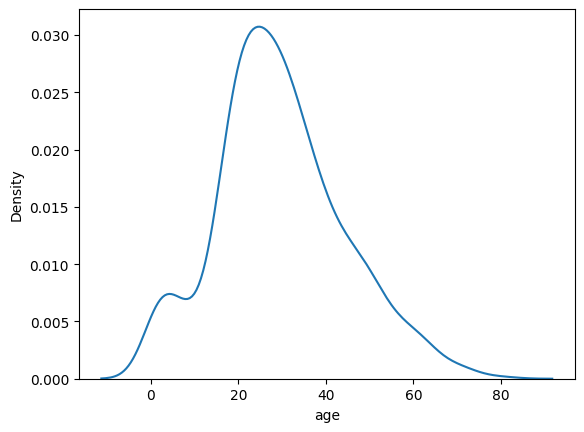

In [58]:
sns.kdeplot(df['age'])

In [59]:
mean_age = df['age'].mean()  # filling the null values with the mean of the age
df['age'].fillna(mean_age, inplace = True)

C:\Users\bhosa\AppData\Local\Temp\ipykernel_20528\1918214948.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(mean_age, inplace = True)


In [60]:
df.isnull().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age             0.000000
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [61]:
df['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

In [62]:
df.drop('deck', axis  = 1, inplace = True) 
# as more than 70% of the data is null hence dropping the deck col

In [63]:
df_num = df.select_dtypes(exclude = ['O', 'category', 'bool'])  # numeric columns 
df_cat = df.select_dtypes(include = ['O', 'category', 'bool'])  # categorical columns 
# Note -> the values in the target variable (survived) are as 0 and 1, and the dtype of the column
#is int hence it is considered as numeric column by the system, but actually it is categorical 

In [64]:
df_num.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [65]:
df_cat.describe()

,sex,embarked,class,who,adult_male,embark_town,alive,alone
count,891,889,891,891,891,889,891,891
unique,2,3,3,3,2,3,2,2
top,male,S,Third,man,True,Southampton,no,True
freq,577,644,491,537,537,644,549,537


In [66]:
df_cat['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [67]:
df_cat['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [68]:
df_cat.drop('embark_town', axis = 1, inplace = True) 
# since the data in the columns embark_town and embarked are representing the same data 
#hence we can drop any one of the columns 

In [69]:
df_cat.isnull().sum()

sex           0
embarked      2
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [70]:
df_cat['embarked'].fillna('S', inplace = True) # fill the column with the mode of the data

C:\Users\bhosa\AppData\Local\Temp\ipykernel_20528\3823791644.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cat['embarked'].fillna('S', inplace = True) # fill the column with the mode of the data


In [71]:
df_cat.isnull().sum()

sex           0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [72]:
df_num.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [73]:
df_num.skew()

survived    0.478523
pclass     -0.630548
age         0.434488
sibsp       3.695352
parch       2.749117
fare        4.787317
dtype: float64

<Axes: ylabel='fare'>

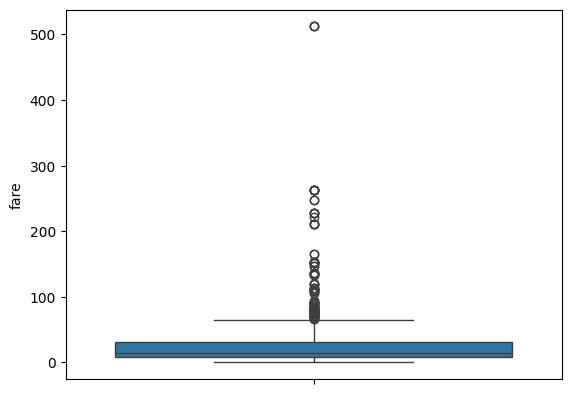

In [74]:
sns.boxplot(df['fare'])

In [75]:
df_num.drop('fare', axis = 1, inplace = True)

In [76]:
df_num.skew()

survived    0.478523
pclass     -0.630548
age         0.434488
sibsp       3.695352
parch       2.749117
dtype: float64

<Axes: xlabel='parch', ylabel='Density'>

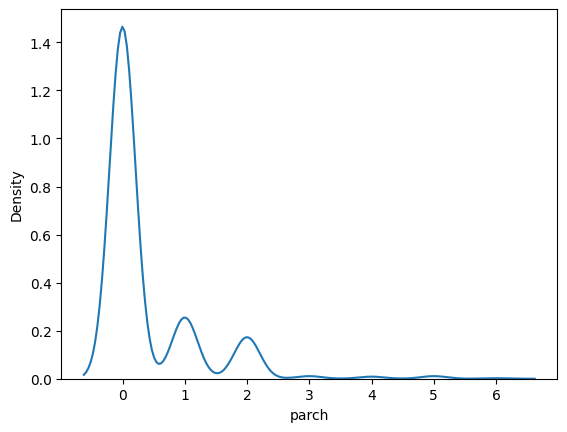

In [77]:
sns.kdeplot(df['parch'])

<Axes: xlabel='sibsp', ylabel='Density'>

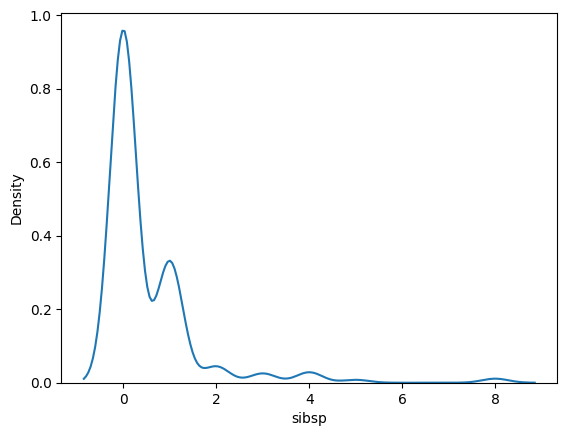

In [78]:
sns.kdeplot(df['sibsp'])

In [79]:
def get_whiskers(col):

    q1 = np.quantile(col, 0.25)

    q3=np.quantile(col, 0.75)

    IQR = q3 - q1

    UB = q3 + 1.5*IQR

    LB = q1 - 1.5*IQR

    return LB, UB


In [80]:
lw, uw = get_whiskers(df['parch']) 

In [81]:
# Treatment of outliers for parch column
parch_mode = df['parch'].mode()
df_num['parch_clean']= np.where((df_num['parch']<lw) | (df_num['parch']>uw), parch_mode, df_num['parch'] ) 

In [82]:
df_num.skew()

survived       0.478523
pclass        -0.630548
age            0.434488
sibsp          3.695352
parch          2.749117
parch_clean    0.000000
dtype: float64

In [83]:
# Treatment of outliers for sibsp column
lw, uw = get_whiskers(df['sibsp']) 
sibsp_mode = df['sibsp'].mode()
df_num['sibsp_clean']= np.where((df_num['sibsp']<lw) | (df_num['sibsp']>uw), sibsp_mode, df_num['sibsp'] ) 

In [84]:
df_num.skew()

survived       0.478523
pclass        -0.630548
age            0.434488
sibsp          3.695352
parch          2.749117
parch_clean    0.000000
sibsp_clean    1.534839
dtype: float64

In [85]:
# Since the IQR techniqueis only able to reduce 50% of the outliers 
# Lets check the sqrt_transformation, log_transformation
df_num['sibsp_sqrt'] = np.sqrt(df_num['sibsp'])
df_num['sibsp_log'] = np.log(df_num['sibsp'])

C:\Users\bhosa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [86]:
df_num.skew()

C:\Users\bhosa\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


survived       0.478523
pclass        -0.630548
age            0.434488
sibsp          3.695352
parch          2.749117
parch_clean    0.000000
sibsp_clean    1.534839
sibsp_sqrt     1.436526
sibsp_log           NaN
dtype: float64

<Axes: xlabel='sibsp_log', ylabel='Density'>

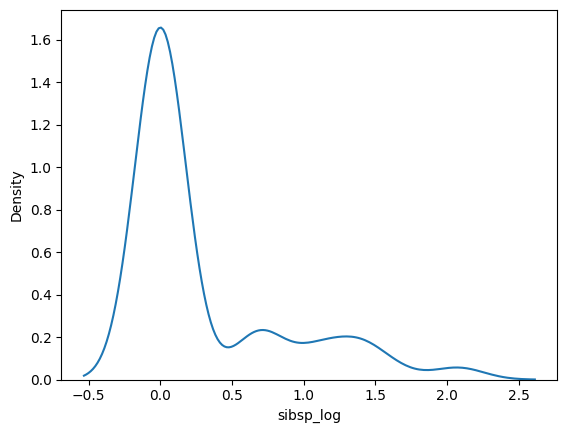

In [87]:
sns.kdeplot(df_num['sibsp_log'])

In [88]:
df_num.drop(['sibsp', 'parch','sibsp_clean', 'sibsp_log' ], axis = 1, inplace = True)

In [89]:
df_num.skew()

survived       0.478523
pclass        -0.630548
age            0.434488
parch_clean    0.000000
sibsp_sqrt     1.436526
dtype: float64

In [90]:
df_cat.drop(['adult_male', 'alive', 'alone'], axis= 1, inplace = True)

In [91]:
df_cat.head()

,sex,embarked,class,who
0,male,S,Third,man
1,female,C,First,woman
2,female,S,Third,woman
3,female,S,First,woman
4,male,S,Third,man


In [92]:
from sklearn.preprocessing import OrdinalEncoder

In [93]:
oe = OrdinalEncoder()
encode = oe.fit_transform(df_cat)

In [94]:
df_cat = pd.DataFrame(encode, columns= oe.feature_names_in_)

In [95]:
df_cat.head()

,sex,embarked,class,who
0,1.0,2.0,2.0,1.0
1,0.0,0.0,0.0,2.0
2,0.0,2.0,2.0,2.0
3,0.0,2.0,0.0,2.0
4,1.0,2.0,2.0,1.0


In [96]:
df_num.head()

,survived,pclass,age,parch_clean,sibsp_sqrt
0,0,3,22.0,0,1.0
1,1,1,38.0,0,1.0
2,1,3,26.0,0,0.0
3,1,1,35.0,0,1.0
4,0,3,35.0,0,0.0


In [97]:
df_final = pd.merge(df_num, df_cat, left_index=True, right_index=True)

In [98]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   age          891 non-null    float64
 3   parch_clean  891 non-null    int64  
 4   sibsp_sqrt   891 non-null    float64
 5   sex          891 non-null    float64
 6   embarked     891 non-null    float64
 7   class        891 non-null    float64
 8   who          891 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 62.8 KB


In [99]:
x = df_final.drop('survived', axis = 1)  # features
y = df_final['survived']  # target variable

In [100]:
# trian test split 
from sklearn.model_selection import train_test_split



In [101]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 1111)

In [102]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((712, 8), (712,), (179, 8), (179,))

In [103]:
# model building 

from sklearn.linear_model import LogisticRegression


In [104]:
log_reg = LogisticRegression()
log_reg.fit(xtrain, ytrain)
ypred = log_reg.predict(xtest)

# Evaluation Metrics which are used for Classification 

- Confusion Metric
- Accuracy Score
- Recall
- Precision
- Specificity
- ROC_AUC Curve
- F1 - Score 

In [105]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [106]:
confusion_matrix(ytest, ypred)

array([[91, 10],
       [18, 60]], dtype=int64)

In [107]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       101
           1       0.86      0.77      0.81        78

    accuracy                           0.84       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179



In [108]:
91 + 10 +18+60

179

In [109]:
179 - 28 # 28 wrong classifications/predictions

151

In [110]:
151/179  # 151 are correct predictions /clasification

0.8435754189944135

In [111]:
accuracy_score(ytest, ypred)

0.8435754189944135

In [114]:
# Calculate accuracy
accuracy = accuracy_score(ytest, ypred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.84


In [115]:
# Confusion matrix and classification report
print(confusion_matrix(ytest, ypred))
print(classification_report(ytest, ypred))

[[91 10]
 [18 60]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       101
           1       0.86      0.77      0.81        78

    accuracy                           0.84       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.84      0.84      0.84       179

